In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
X_train, X_test, Y_train, Y_test = load('../../preprocessing/classification_dataset.joblib')
X_train.head()

,stop_time,driver_gender,driver_age,search_conducted,drugs_related_stop,stop_month,stop_day,Asian,Black,Hispanic,...,0-15 Min,16-30 Min,30+ Min,2005,2006,2007,2008,2009,2010,2011
32160,22.533333,0,36.0,0,0,1,30,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41236,12.000000,0,44.0,0,0,3,23,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5057,14.050000,1,18.0,0,0,3,24,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3559,18.166667,0,51.0,0,0,1,30,0,0,0,...,1,0,0,0,1,0,0,0,0,0
29005,6.766667,1,16.0,0,0,9,16,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39664 entries, 32160 to 47684
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   stop_time                         39664 non-null  float64
 1   driver_gender                     39664 non-null  int64  
 2   driver_age                        39664 non-null  float64
 3   search_conducted                  39664 non-null  int64  
 4   drugs_related_stop                39664 non-null  int64  
 5   stop_month                        39664 non-null  int64  
 6   stop_day                          39664 non-null  int64  
 7   Asian                             39664 non-null  uint8  
 8   Black                             39664 non-null  uint8  
 9   Hispanic                          39664 non-null  uint8  
 10  Other                             39664 non-null  uint8  
 11  White                             39664 non-null  uint8  
 12  

# Normalizacija

Za normalizaciju ćemo iskoristiti MinMaxScaler Vrednosti min i max ćemo odrediti na osnovu trening skupa, a zatim primeniti transformaciju na test i trening skup.

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Nije uhapšen', 'Uhapšen'], index=['0', '1']))
    print("---------------------------------------------------------------------------------")

## KNN

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38169
           1       0.73      0.33      0.46      1495

    accuracy                           0.97     39664
   macro avg       0.85      0.66      0.72     39664
weighted avg       0.97      0.97      0.96     39664

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         37989      180
1           999      496
---------------------------------------------------------------------------------


In [43]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9542
           1       0.52      0.22      0.31       374

    accuracy                           0.96      9916
   macro avg       0.74      0.61      0.65      9916
weighted avg       0.95      0.96      0.96      9916

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0          9465       77
1           291       83
---------------------------------------------------------------------------------


Probaćemo da unapredimo model podešavanjem hiper-parametara.

# Podešavanje hiper-parametara

## Grid Search CV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [44]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)

In [45]:
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.964 total time=   1.3s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.965 total time=   1.4s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.964 total time=   1.3s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.966 total time=   1.3s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.962 total time=   1.3s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.963 total time=   1.2s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.965 total time=   1.1s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.964 total time=   1.1s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.965 total time=   1.1s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.966 total time=   1.1s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.962 total time=   1.1s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.964 total time=   1.3s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.965 total time=   1.3s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.963 total time=   1.3s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.963 total time=   1.5s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.965 total time=   1.2s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.965 total time=   1.1s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.965 total time=   1.3s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.966 total time=   1.2s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.964 total time=   1.2s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.963 total time=   1.2s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.965 total time=   0.4s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.965 total time=   0.4

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [46]:
estimator.best_params_

{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}

In [47]:
estimator.best_score_

0.9647790975980755

In [48]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38169
           1       1.00      0.98      0.99      1495

    accuracy                           1.00     39664
   macro avg       1.00      0.99      1.00     39664
weighted avg       1.00      1.00      1.00     39664

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38169        0
1            23     1472
---------------------------------------------------------------------------------


In [49]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9542
           1       0.64      0.15      0.24       374

    accuracy                           0.96      9916
   macro avg       0.81      0.57      0.61      9916
weighted avg       0.96      0.96      0.95      9916

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0          9511       31
1           318       56
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate unakrsne validacije.

In [50]:
estimator.cv_results_

{'mean_fit_time': array([0.00757456, 0.00714783, 0.00634034, 0.0088098 , 0.0057075 ,
        0.00734329, 0.00605889, 0.00750641, 0.00620345, 0.00702775,
        0.00619558, 0.0070043 , 0.00598443, 0.00718017, 0.00712295,
        0.00834827, 0.00615056, 0.00736415, 0.00648232, 0.00800578,
        0.00617504, 0.0075471 , 0.00636661, 0.00755235, 0.00606298,
        0.00685644, 0.00689383, 0.00838172, 0.00690476, 0.00751726,
        0.00618215, 0.00784945]),
 'std_fit_time': array([0.00170385, 0.00068574, 0.00046217, 0.00210875, 0.00112143,
        0.00112102, 0.00057126, 0.00077996, 0.00090321, 0.00059145,
        0.00035662, 0.0005575 , 0.00099731, 0.00063156, 0.00201046,
        0.00275669, 0.00089506, 0.00077072, 0.00076176, 0.00130824,
        0.00089227, 0.0014718 , 0.00093776, 0.00070414, 0.00053444,
        0.00090366, 0.00146884, 0.00127613, 0.00095728, 0.00049077,
        0.00036376, 0.00090904]),
 'mean_score_time': array([1.39143554, 1.17182414, 0.41475407, 0.27713573, 1.328178

## Slučajne šume

In [51]:
baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train, Y_train)

report(baggingKnn, X_train, Y_train)
report(baggingKnn, X_test, Y_test, "test")

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38169
           1       0.75      0.32      0.45      1495

    accuracy                           0.97     39664
   macro avg       0.86      0.66      0.72     39664
weighted avg       0.97      0.97      0.96     39664

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
   Nije uhapšen  Uhapšen
0         38008      161
1          1017      478
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on test data
-----------------------------------------------------------------------------

# Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. Za poređenje koristimo ROC krivu.

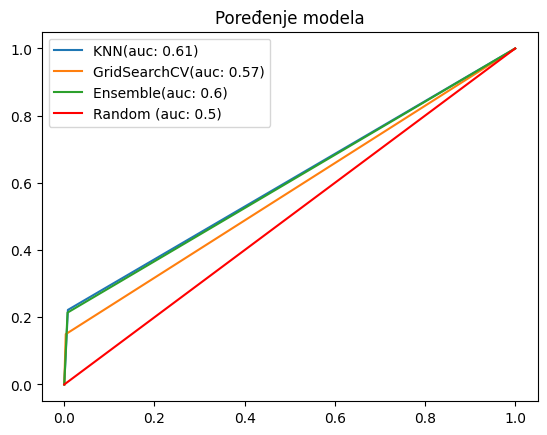

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_, baggingKnn]
model_names = ['KNN', 'GridSearchCV', 'Ensemble']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Biramo model sa najvećom AUC vrednošću - KNN.